# 0. Import  & Initialisations

In [78]:
from ecg_qc import ecg_qc
import time
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from dtreeviz.trees import *
import pandas as pd
from sklearn import tree
from streamlit_visualization.modules.graph_generation import annot_classification_correspondance
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df_train_sqi = pd.read_csv('training_dataset/df_consolidated_ml.csv', index_col=0)
df_train_sqi.head()

timestamp_start                  timestamp_end  qSQI_score  \
0  2020-12-18 13:00:00.000000000  2020-12-18 13:00:02.000000000       1.000   
1  2020-12-18 13:00:02.000000000  2020-12-18 13:00:04.000000000       1.000   
2  2020-12-18 13:00:04.000000000  2020-12-18 13:00:06.000000000       0.857   
3  2020-12-18 13:00:06.000000000  2020-12-18 13:00:08.000000000       1.000   
4  2020-12-18 13:00:08.000000000  2020-12-18 13:00:10.000000000       1.000   

   cSQI_score  sSQI_score  kSQI_score  pSQI_score  basSQI_score  annot_2  \
0       0.501       1.924       6.664       0.499         0.967        1   
1       0.627       2.056       7.390       0.515         0.978        1   
2       0.820       1.333       3.494       0.484         0.975        1   
3       0.499       0.884       2.709       0.468         0.930        1   
4       0.482       1.817       5.480       0.433         0.991        1   

   annot_3         record  consensus  
0        1  emg6+emg6- 77          1  
1        1  emg6+emg6- 77          1  
2        1  emg6+emg6- 77          1  
3        1  emg6+emg6- 77          1  
4        1  emg6+emg6- 77          1

In [3]:
# Val Dataset
df_val_sqi = pd.read_csv('validation_dataset/df_ml_103001_2s.csv')
df_val_sqi.head()

timestamp_start  timestamp_end  qSQI_score  cSQI_score  sSQI_score  \
0         28800001       28802000       0.500       0.768       3.127   
1         28802001       28804000       1.000       0.672       3.325   
2         28804001       28806000       1.000       0.588       3.772   
3         28806001       28808000       0.500       0.000       3.122   
4         28808001       28810000       0.667       1.164       3.114   

   kSQI_score  pSQI_score  basSQI_score  classif  classif_avg  
0      11.738       0.510         0.985        1          1.0  
1      13.034       0.519         0.979        1          1.0  
2      16.345       0.513         0.974        1          1.0  
3      12.985       0.526         0.983        1          1.0  
4      11.619       0.518         0.980        1          1.0

In [15]:
### Initialisation of ecg_qc instances

ecg_qc_rfc = ecg_qc(model='training_dataset/model_2s_rfc_normalized_premium.pkl',
                      normalized=True)
#ecg_qc_rfc = ecg_qc(normalized=False)
ecg_qc_dtc = ecg_qc(model='training_dataset/model_dtc_direct.pkl',
                     normalized=False)

try:
    ecg_qc_rfc.model = ecg_qc_rfc.model.best_estimator_
except:
    pass

/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/scikit_learn-0.24.1-py3.6-linux-x86_64.egg/sklearn/base.py:315: UserWarning:

Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.

/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/scikit_learn-0.24.1-py3.6-linux-x86_64.egg/sklearn/base.py:315: UserWarning:

Trying to unpickle estimator OneHotEncoder from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.

/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/scikit_learn-0.24.1-py3.6-linux-x86_64.egg/sklearn/base.py:315: UserWarning:

Trying to unpickle estimator ColumnTransformer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.

/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3

In [16]:
# Adding Predictions

for dataframe in [df_train_sqi, df_val_sqi]:

    dataframe['rfc_pred'] = [ecg_qc_rfc.predict_quality([x]) for x in dataframe.iloc[:, 2:8].values]
    dataframe['dtc_pred'] = [ecg_qc_dtc.predict_quality([x]) for x in dataframe.iloc[:, 2:8].values]
    
df_val_sqi['consensus'] = df_val_sqi['classif']

In [17]:
# Compute score for both dataset and both models

for dataframe in [df_train_sqi, df_val_sqi]:
    for col in ['rfc_pred', 'dtc_pred']:

        print(f'{col}:')
        print(f"f1_score : {f1_score(dataframe[col].values, dataframe['consensus'].values)}")
        print(f"accuracy_score: {accuracy_score(dataframe[col].values, dataframe['consensus'].values)}")
        print(dataframe['consensus'].value_counts()/dataframe.shape[0])
        print('\n')

rfc_pred:
f1_score : 0.7920771965464702
accuracy_score: 0.6898484848484848
1    0.593333
0    0.406667
Name: consensus, dtype: float64


dtc_pred:
f1_score : 0.9676610679368264
accuracy_score: 0.9609090909090909
1    0.593333
0    0.406667
Name: consensus, dtype: float64


rfc_pred:
f1_score : 0.676300578034682
accuracy_score: 0.5333333333333333
1    0.6625
0    0.3375
Name: consensus, dtype: float64


dtc_pred:
f1_score : 0.6263020833333334
accuracy_score: 0.5216666666666666
1    0.6625
0    0.3375
Name: consensus, dtype: float64




In [30]:
df_train_sqi.iloc[:,2:8].describe()

qSQI_score   cSQI_score   sSQI_score   kSQI_score   pSQI_score  \
count  6600.000000  6600.000000  6600.000000  6600.000000  6600.000000   
mean      0.655783     0.675578     1.724129     9.954305     0.454387   
std       0.275371     0.164303     2.192340    12.758009     0.066733   
min       0.000000     0.000000    -2.995000    -1.851000     0.157000   
25%       0.500000     0.549000    -0.028000     0.780500     0.438000   
50%       0.667000     0.661000     1.290000     4.125500     0.465000   
75%       0.800000     0.795000     2.877000    12.846250     0.485000   
max       1.000000     1.409000    11.564000   143.106000     0.733000   

       basSQI_score  
count   6600.000000  
mean       0.949241  
std        0.052338  
min        0.421000  
25%        0.933000  
50%        0.967000  
75%        0.983000  
max        1.000000

In [29]:
df_val_sqi.iloc[:,2:8].describe()

qSQI_score   cSQI_score   sSQI_score   kSQI_score   pSQI_score  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.621078     0.668428     3.599284    15.732582     0.522501   
std       0.277671     0.311750     0.672979     4.511184     0.020708   
min       0.000000     0.000000    -0.373000     0.471000     0.434000   
25%       0.500000     0.551750     3.186500    12.228250     0.514000   
50%       0.667000     0.679000     3.647500    15.114000     0.525000   
75%       0.800000     0.856250     4.090250    19.560500     0.534000   
max       1.000000     1.404000     4.823000    26.217000     0.599000   

       basSQI_score  
count   1200.000000  
mean       0.977787  
std        0.014149  
min        0.872000  
25%        0.971750  
50%        0.980000  
75%        0.987000  
max        0.999000

qSQI_score   cSQI_score   sSQI_score   kSQI_score   pSQI_score  \
count  5716.000000  5716.000000  5716.000000  5716.000000  5716.000000   
mean     -0.013253    -0.073719    -1.756745    -4.779560    -0.069187   
std       0.033159    -0.120096     1.539260     8.478286     0.050387   
min       0.000000     0.000000    -2.622000    -2.322000    -0.277000   
25%       0.000000    -0.049500    -3.223750   -11.109250    -0.079000   
50%       0.000000    -0.080000    -2.019500    -9.221000    -0.059000   
75%       0.000000    -0.116250    -1.003250    -4.571500    -0.045750   
max       0.000000     0.005000     6.801000   118.101000     0.134000   

       basSQI_score  
count   5716.000000  
mean      -0.027274  
std        0.038090  
min       -0.451000  
25%       -0.034000  
50%       -0.012000  
75%       -0.003000  
max        0.001000

In [52]:
df_train_sqi.iloc[:,2:8].describe() - df_val_sqi.iloc[:,2:8].describe()

qSQI_score   cSQI_score   sSQI_score   kSQI_score   pSQI_score  \
count  5400.000000  5400.000000  5400.000000  5400.000000  5400.000000   
mean      0.034704     0.007150    -1.875155    -5.778277    -0.068114   
std      -0.002300    -0.147447     1.519361     8.246825     0.046024   
min       0.000000     0.000000    -2.622000    -2.322000    -0.277000   
25%       0.000000    -0.002750    -3.214500   -11.447750    -0.076000   
50%       0.000000    -0.018000    -2.357500   -10.988500    -0.060000   
75%       0.000000    -0.061250    -1.213250    -6.714250    -0.049000   
max       0.000000     0.005000     6.741000   116.889000     0.134000   

       basSQI_score  
count   5400.000000  
mean      -0.028546  
std        0.038188  
min       -0.451000  
25%       -0.038750  
50%       -0.013000  
75%       -0.004000  
max        0.001000

In [61]:
# Working cases
df_train_ = df_train_sqi[df_train_sqi['consensus'] == df_train_sqi['dtc_pred']]
df_val_ = df_val_sqi[df_val_sqi['consensus'] == df_val_sqi['dtc_pred']]

df_train_.iloc[:,2:8].describe() - df_val_.iloc[:,2:8].describe()

qSQI_score   cSQI_score   sSQI_score   kSQI_score   pSQI_score  \
count  5716.000000  5716.000000  5716.000000  5716.000000  5716.000000   
mean     -0.013253    -0.073719    -1.756745    -4.779560    -0.069187   
std       0.033159    -0.120096     1.539260     8.478286     0.050387   
min       0.000000     0.000000    -2.622000    -2.322000    -0.277000   
25%       0.000000    -0.049500    -3.223750   -11.109250    -0.079000   
50%       0.000000    -0.080000    -2.019500    -9.221000    -0.059000   
75%       0.000000    -0.116250    -1.003250    -4.571500    -0.045750   
max       0.000000     0.005000     6.801000   118.101000     0.134000   

       basSQI_score  
count   5716.000000  
mean      -0.027274  
std        0.038090  
min       -0.451000  
25%       -0.034000  
50%       -0.012000  
75%       -0.003000  
max        0.001000

In [62]:
df_train_.iloc[:,2:8].describe() 

qSQI_score   cSQI_score   sSQI_score   kSQI_score   pSQI_score  \
count  6342.000000  6342.000000  6342.000000  6342.000000  6342.000000   
mean      0.650863     0.676316     1.746178    10.184616     0.452987   
std       0.276360     0.164551     2.223179    12.921882     0.067158   
min       0.000000     0.000000    -2.995000    -1.851000     0.157000   
25%       0.500000     0.549250    -0.073500     0.779000     0.437000   
50%       0.667000     0.662000     1.306000     4.199000     0.465000   
75%       0.800000     0.796000     2.989750    13.771750     0.484000   
max       1.000000     1.409000    11.564000   143.106000     0.733000   

       basSQI_score  
count   6342.000000  
mean       0.950829  
std        0.051684  
min        0.421000  
25%        0.938000  
50%        0.968000  
75%        0.984000  
max        1.000000

In [63]:
df_val_.iloc[:,2:8].describe() 

qSQI_score  cSQI_score  sSQI_score  kSQI_score  pSQI_score  \
count  626.000000  626.000000  626.000000  626.000000  626.000000   
mean     0.664117    0.750035    3.502923   14.964176    0.522174   
std      0.243201    0.284647    0.683919    4.443597    0.016771   
min      0.000000    0.000000   -0.373000    0.471000    0.434000   
25%      0.500000    0.598750    3.150250   11.888250    0.516000   
50%      0.667000    0.742000    3.325500   13.420000    0.524000   
75%      0.800000    0.912250    3.993000   18.343250    0.529750   
max      1.000000    1.404000    4.763000   25.005000    0.599000   

       basSQI_score  
count    626.000000  
mean       0.978102  
std        0.013594  
min        0.872000  
25%        0.972000  
50%        0.980000  
75%        0.987000  
max        0.999000

In [77]:
# sSQi and kSqi are issues

In [54]:
# Global - working
df_train_sqi.iloc[:,2:8].describe() - df_val_sqi.iloc[:,2:8].describe() - (df_train_.iloc[:,2:8].describe() - df_val_.iloc[:,2:8].describe())

qSQI_score  cSQI_score  sSQI_score  kSQI_score  pSQI_score  \
count -316.000000 -316.000000 -316.000000 -316.000000 -316.000000   
mean     0.047958    0.080869   -0.118409   -0.998717    0.001073   
std     -0.035459   -0.027351   -0.019899   -0.231460   -0.004363   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.046750    0.009250   -0.338500    0.003000   
50%      0.000000    0.062000   -0.338000   -1.767500   -0.001000   
75%      0.000000    0.055000   -0.210000   -2.142750   -0.003250   
max      0.000000    0.000000   -0.060000   -1.212000    0.000000   

       basSQI_score  
count   -316.000000  
mean      -0.001272  
std        0.000098  
min        0.000000  
25%       -0.004750  
50%       -0.001000  
75%       -0.001000  
max        0.000000

In [57]:
# Not Working cases
df_train_ = df_train_sqi[df_train_sqi['consensus'] != df_train_sqi['dtc_pred']]
df_val_ = df_val_sqi[df_val_sqi['consensus'] != df_val_sqi['dtc_pred']]

df_train_.iloc[:,2:8].describe() - df_val_.iloc[:,2:8].describe()

qSQI_score  cSQI_score  sSQI_score  kSQI_score  pSQI_score  \
count -316.000000 -316.000000 -316.000000 -316.000000 -316.000000   
mean     0.202568    0.078009   -2.522231  -12.277648   -0.034055   
std     -0.086604   -0.158576    0.431057    0.669127    0.018474   
min      0.000000    0.000000   -2.756000   -3.050000   -0.045000   
25%      0.267000    0.027750   -2.758250  -12.548750   -0.048000   
50%      0.229000    0.014000   -2.765500  -13.112000   -0.046000   
75%      0.200000   -0.006250   -2.413750  -14.513250   -0.030000   
max      0.000000   -0.179000    0.740000    9.675000    0.121000   

       basSQI_score  
count   -316.000000  
mean      -0.067237  
std        0.038509  
min       -0.183000  
25%       -0.092500  
50%       -0.059500  
75%       -0.036500  
max       -0.006000

In [59]:
df_train_.iloc[:,2:8].describe() 

qSQI_score  cSQI_score  sSQI_score  kSQI_score  pSQI_score  \
count  258.000000  258.000000  258.000000  258.000000  258.000000   
mean     0.776709    0.657438    1.182143    4.292953    0.488802   
std      0.217680    0.157301    1.076263    5.107356    0.042770   
min      0.000000    0.000000   -2.266000   -1.371000    0.394000   
25%      0.667000    0.534000    0.494000    0.951500    0.464000   
50%      0.800000    0.639000    1.054000    2.867500    0.483000   
75%      1.000000    0.775250    1.781500    6.132500    0.508000   
max      1.000000    1.218000    5.563000   35.892000    0.699000   

       basSQI_score  
count    258.000000  
mean       0.910205  
std        0.053244  
min        0.710000  
25%        0.877500  
50%        0.920500  
75%        0.951500  
max        0.993000

In [60]:
df_val_.iloc[:,2:8].describe() 

qSQI_score  cSQI_score  sSQI_score  kSQI_score  pSQI_score  \
count  574.000000  574.000000  574.000000  574.000000  574.000000   
mean     0.574141    0.579429    3.704375   16.570601    0.522857   
std      0.304284    0.315877    0.645206    4.438230    0.024297   
min      0.000000    0.000000    0.490000    1.679000    0.439000   
25%      0.400000    0.506250    3.252250   13.500250    0.512000   
50%      0.571000    0.625000    3.819500   15.979500    0.529000   
75%      0.800000    0.781500    4.195250   20.645750    0.538000   
max      1.000000    1.397000    4.823000   26.217000    0.578000   

       basSQI_score  
count    574.000000  
mean       0.977443  
std        0.014736  
min        0.893000  
25%        0.970000  
50%        0.980000  
75%        0.988000  
max        0.999000

In [56]:
# Global - not Working
df_train_sqi.iloc[:,2:8].describe() - df_val_sqi.iloc[:,2:8].describe() - (df_train_.iloc[:,2:8].describe() - df_val_.iloc[:,2:8].describe())

qSQI_score   cSQI_score   sSQI_score   kSQI_score   pSQI_score  \
count  5716.000000  5716.000000  5716.000000  5716.000000  5716.000000   
mean     -0.167864    -0.070860     0.647076     6.499370    -0.034059   
std       0.084304     0.011129     1.088304     7.577699     0.027551   
min       0.000000     0.000000     0.134000     0.728000    -0.232000   
25%      -0.267000    -0.030500    -0.456250     1.101000    -0.028000   
50%      -0.229000    -0.032000     0.408000     2.123500    -0.014000   
75%      -0.200000    -0.055000     1.200500     7.799000    -0.019000   
max       0.000000     0.184000     6.001000   107.214000     0.013000   

       basSQI_score  
count   5716.000000  
mean       0.038691  
std       -0.000321  
min       -0.268000  
25%        0.053750  
50%        0.046500  
75%        0.032500  
max        0.007000

In [47]:
# Trying with simpler elements

df_simple = df_train_sqi.loc[:, ['qSQI_score', 'cSQI_score', 'pSQI_score', 'basSQI_score']]
X_simple = df_simple.values
y = df_train_sqi['consensus'].tolist()
model = DecisionTreeClassifier()

algo = DecisionTreeClassifier()
params = {'min_samples_leaf': np.arange(1, 5, 1),
      'max_depth': np.arange(2, 25, 1),
      'max_features': [4]
      }
grid_search = GridSearchCV(estimator=algo,
                       param_grid=params,
                       scoring='f1',
                       cv=5,
                       verbose=5,
                       n_jobs=-1)

grid_search.fit(X_simple, y)
y_pred = grid_search.predict(X_simple)
print(f'f1_score : {f1_score(y, y_pred)}')
print(f'accuracy_score : {accuracy_score(y, y_pred)}')

print('\n val')
X_val = df_val_sqi.loc[:, ['qSQI_score', 'cSQI_score', 'pSQI_score', 'basSQI_score']].values
y_val = df_val_sqi['consensus'].values
y_pred_val = grid_search.predict(X_val)
print(f'f1_score : {f1_score(y_val, y_pred_val)}')
print(f'accuracy_score : {accuracy_score(y_val, y_pred_val)}')

Fitting 5 folds for each of 92 candidates, totalling 460 fits
f1_score : 0.8814753905791143
accuracy_score : 0.8471212121212122

 val
f1_score : 0.5850622406639004
accuracy_score : 0.5


In [ ]:
# algo = RandomForestClassifier()
algo = DecisionTreeClassifier()

params = {'min_samples_leaf': np.arange(1, 5, 1),
      'max_depth': np.arange(2, 16, 2),
      'max_features': ['auto'],
      }
grid_search = GridSearchCV(estimator=algo,
                       param_grid=params,
                       scoring='f1',
                       cv=5,
                       verbose=5,
                       n_jobs=-1)
grid_search.fit(X_train, y_train)


# I. Random Forest

In [18]:
forest = ecg_qc_rfc.model

sqi_names = ['q_sqi_score', 'c_sqi_score', 's_sqi_score',
             'k_sqi_score', 'p_sqi_score', 'bas_sqi_score']
feature_names = sqi_names

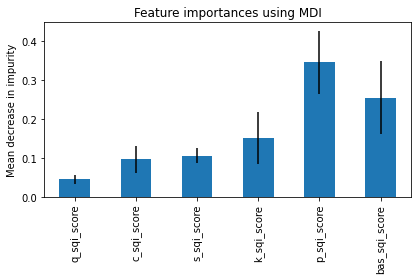

In [19]:
# Importance des features

importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# II. Decision Tree Classifer

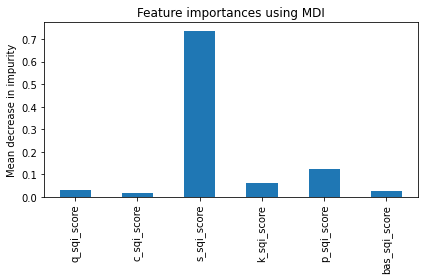

In [20]:
# Importance des features

importances = ecg_qc_dtc.model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

True :1
Pred :1


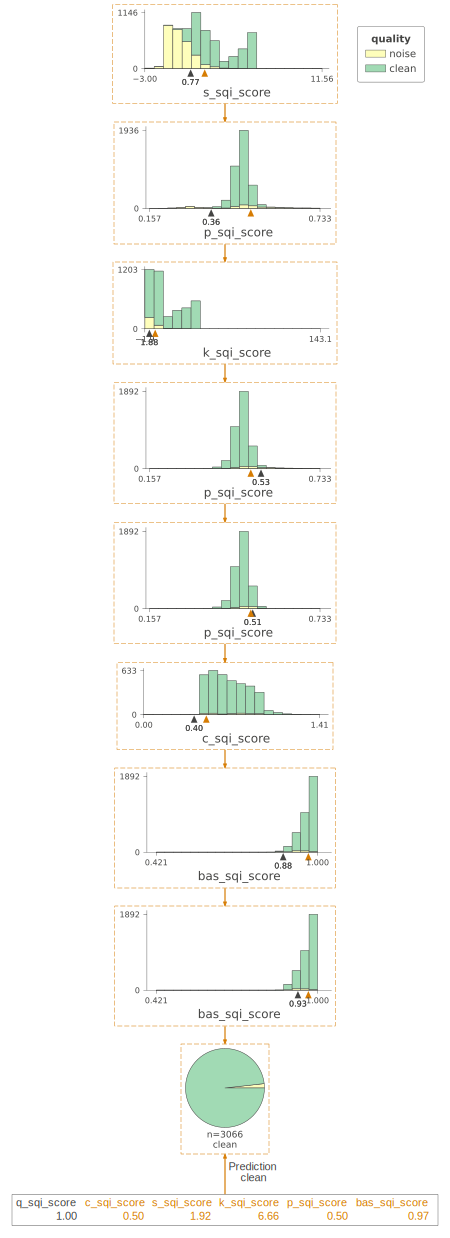

In [25]:
# Train dataset

dataset = df_train_sqi
model = ecg_qc_dtc.model

X = dataset.iloc[:, 2:8].values
y_pred = dataset['dtc_pred'].tolist()
y_true = np.array(dataset['consensus'].values)

print(f'True :{dataset["consensus"].values[0]}')
print(f'Pred :{dataset["dtc_pred"].values[0]}')


viz = dtreeviz(model, X, y_true,
            target_name='quality',
            feature_names=feature_names,
            class_names=['noise', 'clean'],
            X=X[0],
            show_just_path=True)

viz

In [24]:
# Val dataset

dataset = df_val_sqi
model = ecg_qc_dtc.model

X = dataset.iloc[:, 2:8].values
y_pred = dataset['dtc_pred'].tolist()
y_true = np.array(dataset['consensus'].values)

print(f'True :{dataset["consensus"].values[0]}')
print(f'Pred :{dataset["dtc_pred"].values[0]}')


viz = dtreeviz(model, X, y_true,
            target_name='quality',
            feature_names=feature_names,
            class_names=['noise', 'clean'])

viz

True :1
Pred :1


True :1
Pred :0


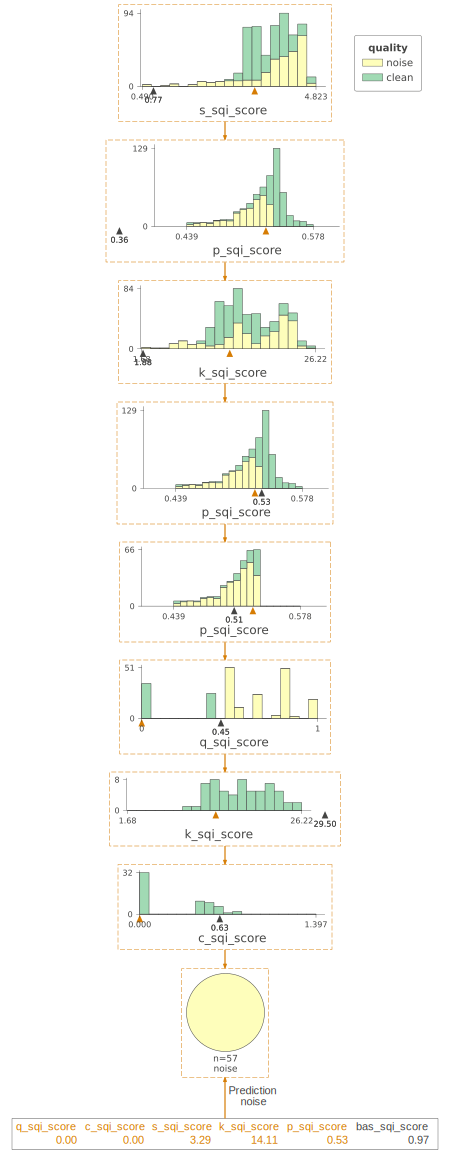

In [26]:
# Val dataset

dataset = df_val_sqi[df_val_sqi['consensus'] != df_val_sqi['dtc_pred']]
model = ecg_qc_dtc.model

X = dataset.iloc[:, 2:8].values
y_pred = dataset['dtc_pred'].tolist()
y_true = np.array(dataset['consensus'].values)

print(f'True :{dataset["consensus"].values[0]}')
print(f'Pred :{dataset["dtc_pred"].values[0]}')


viz = dtreeviz(model, X, y_true,
            target_name='quality',
            feature_names=feature_names,
            class_names=['noise', 'clean'],
            X=X[0],
            show_just_path=True)

viz

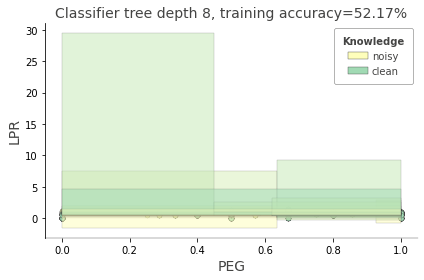

In [76]:
ct = ctreeviz_bivar(ecg_qc_dtc.model, df_val_sqi.iloc[:, 2:8], df_val_sqi['consensus'],
                    feature_names = ['PEG','LPR'],
                    class_names=['noisy', 'clean'],
                    target_name='Knowledge')
plt.tight_layout()
plt.show()

In [ ]:
# Decision Path

print(f'True :{df_wrong_answers["classif"].values[0]}')
print(f'False :{df_wrong_answers["ecg_qc_pred"].values[0]}')

viz = dtreeviz(forest.estimators_[0], X, y_true,
                target_name='quality',
                feature_names=feature_names,
                class_names=['noise', 'clean'],
                X=X[0],
                show_just_path=True)

viz

In [16]:
X = df_val_sqi.iloc[:, 2:8].values
y_pred = df_val_sqi['rfc_pred'].tolist()
y_true = np.array(df_val_sqi['consensus'].values)

In [17]:
viz = dtreeviz(forest.estimators_[0], X, y_true,
                target_name='quality',
                feature_names=feature_names,
                class_names=['noise', 'clean'])

viz.save('viz_tree_103001.svg')

2021-08-02 14:59:29.191 WARNING matplotlib.font_manager: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
2021-08-02 14:59:29.207 WARNING matplotlib.font_manager: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
2021-08-02 15:00:39.256 WARNING matplotlib.font_manager: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


kmeans 0
count : 448
1    0.53125
0    0.46875
Name: classif, dtype: float64
0.6204620462046204
0.48660714285714285


/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).





kmeans 1
count : 142
1    0.950704
0    0.049296
Name: classif, dtype: float64
0.055172413793103454
0.035211267605633804


kmeans 2
count : 113
0    0.548673
1    0.451327
Name: classif, dtype: float64


/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



0.6134969325153374
0.4424778761061947


kmeans 3
count : 49
0    0.938776
1    0.061224
Name: classif, dtype: float64


/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



0.048780487804878044
0.20408163265306123


kmeans 4
count : 448
1    0.821429
0    0.178571
Name: classif, dtype: float64


/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



0.8825806451612903
0.796875




/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



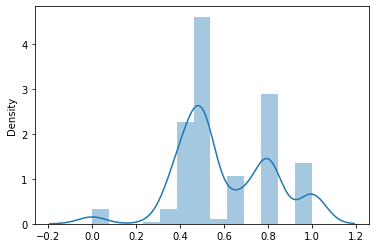

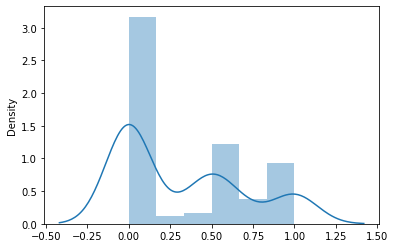

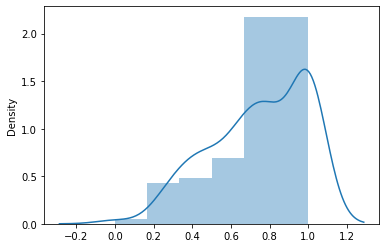

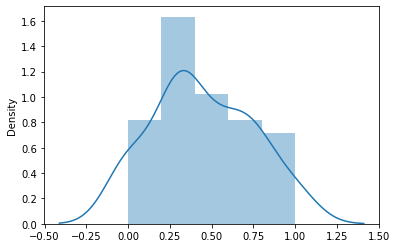

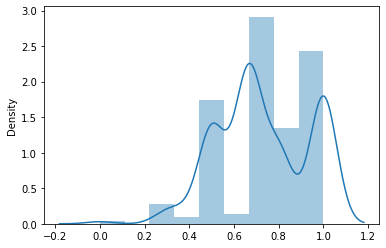

In [28]:
for kmean in range(5):
    print(f'kmeans {kmean}')

    df_temp = df_val_sqi[df_val_sqi['kmeans'] == kmean]
    X_temp = df_temp.iloc[:,2:8].values
    print(f'count : {df_temp.shape[0]}')
    print(df_temp['classif'].value_counts()/df_temp.shape[0])
    y_true_temp = np.array(df_temp['classif'].values)
    predictions = [ecg_qc_rfc.predict_quality([x]) for x in X_temp]
    print(f1_score(y_true_temp, predictions))
    print(accuracy_score(y_true_temp, predictions))
    dis = plt.figure()
    dis = sns.distplot(df_temp['qSQI_score'].values)
    print('\n')

In [161]:
df_validation[df_validation['kmeans'] == 0]

timestamp_start  timestamp_end  qSQI_score  cSQI_score  sSQI_score  \
2            28804001       28806000       1.000       0.588       3.772   
32           28864001       28866000       0.667       1.403       3.267   
52           28904001       28906000       1.000       0.000       3.183   
54           28908001       28910000       1.000       0.673       3.682   
62           28924001       28926000       0.800       0.618       3.944   
...               ...            ...         ...         ...         ...   
1146         58692181       58694180       0.333       0.907       3.510   
1172         58744181       58746180       0.571       0.486       2.639   
1174         58748181       58750180       1.000       0.575       2.948   
1176         58752181       58754180       1.000       0.572       4.072   
1199         58798183       58799999       0.400       0.725       3.564   

      kSQI_score  pSQI_score  basSQI_score  classif  classif_avg  ecg_qc_pred  \
2         16.345       0.513         0.967        1          1.0            1   
32        13.217       0.436         0.927        1          1.0            1   
52        12.400       0.439         0.979        1          1.0            1   
54        15.837       0.506         0.950        1          1.0            1   
62        17.471       0.507         0.948        1          1.0            1   
...          ...         ...           ...      ...          ...          ...   
1146      15.564       0.458         0.871        0          0.0            1   
1172       8.788       0.487         0.985        0          0.0            1   
1174      11.207       0.458         0.944        0          0.0            1   
1176      17.966       0.453         0.987        0          0.0            1   
1199      13.994       0.501         0.926        0          0.0            1   

      kmeans  
2          0  
32         0  
52         0  
54         0  
62         0  
...      ...  
1146       0  
1172       0  
1174       0  
1176       0  
1199       0  

[111 rows x 12 columns]

True :0
False :1


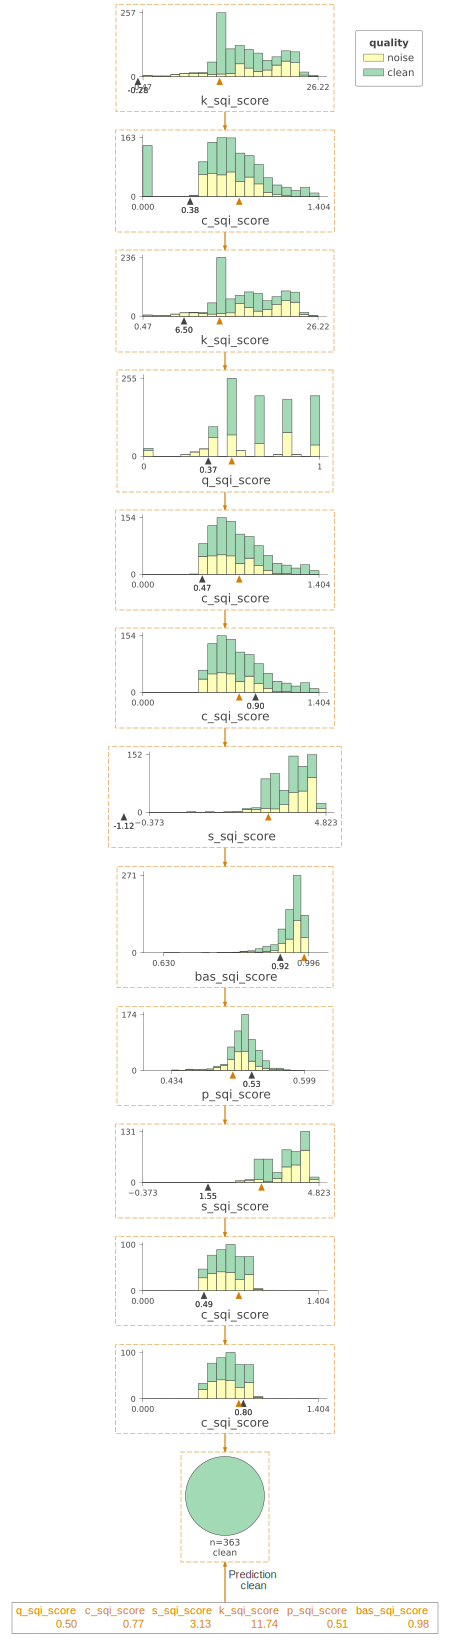

In [145]:
# Decision Path

print(f'True :{df_wrong_answers["classif"].values[0]}')
print(f'False :{df_wrong_answers["ecg_qc_pred"].values[0]}')

viz = dtreeviz(forest.estimators_[0], X, y_true,
                target_name='quality',
                feature_names=feature_names,
                class_names=['noise', 'clean'],
                X=X[0],
                show_just_path=True)

viz

In [75]:
# Decision Path


viz = dtreeviz(forest.estimators_[0], X, y_true,
                target_name='quality',
                feature_names=feature_names,
                class_names=['noise', 'clean'],
                X=X[0],
                show_just_path=True)

viz.save('viz_tree_103001_pred.svg')

In [85]:
from sklearn.metrics import f1_score, accuracy_score

In [86]:
f1_score(y_true, y_pred)

0.7969924812030075

In [87]:
accuracy_score(y_true, y_pred)

0.6625

In [83]:
df_validation['classif'].value_counts()/df_validation.shape[0]

1    0.6625
0    0.3375
Name: classif, dtype: float64

In [90]:
df_wrong_answers = df_validation[df_validation['classif'] != df_validation['ecg_qc_pred']]

In [94]:
df_wrong_answers.iloc[:,2:8].values

array([[ 0.8  ,  0.784,  3.175, 12.127,  0.558,  0.964],
       [ 0.   ,  0.765,  2.276,  7.542,  0.487,  0.889],
       [ 0.   ,  0.42 , -0.126,  1.498,  0.499,  0.734],
       ...,
       [ 0.75 ,  0.666,  3.085, 10.528,  0.518,  0.948],
       [ 0.333,  0.528,  2.802, 10.864,  0.527,  0.939],
       [ 0.4  ,  0.725,  3.564, 13.994,  0.501,  0.926]])

In [141]:
regr = tree.DecisionTreeClassifier(max_depth=10)
regr.fit(X, y_true)
print(f1_score(y_true, regr.predict(X)))
print(accuracy_score(y_true, regr.predict(X)))

0.9460154241645244
0.93


In [142]:
viz = dtreeviz(regr, X, y_true,
                target_name='quality',
                feature_names=feature_names,
                class_names=['noise', 'clean'])

viz

True :0
False :[0]


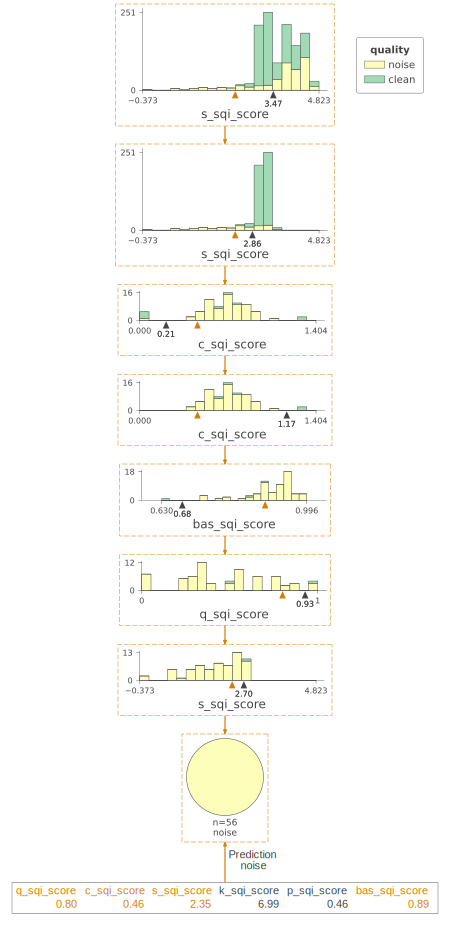

In [135]:
# Decision Path
n = 5
x_ex = df_wrong_answers.iloc[:,2:8].values[n]
print(f'True :{df_wrong_answers["classif"].values[n]}')
print(f'False :{regr.predict([x_ex])}')
viz = dtreeviz(regr, X, y_true,
                target_name='quality',
                feature_names=feature_names,
                class_names=['noise', 'clean'],
                X=df_wrong_answers.iloc[:,2:8].values[5],
                show_just_path=True)
viz

In [127]:
# Decision Path

print(f'True :{df_wrong_answers["classif"].values[0]}')
print(f'False :{df_wrong_answers["ecg_qc_pred"].values[0]}')
viz = dtreeviz(forest.estimators_[0], X, y_true,
                target_name='quality',
                feature_names=feature_names,
                class_names=['noise', 'clean'],
                X=df_wrong_answers.iloc[:,2:8].values[0],
                show_just_path=True)
viz.view()

True :0
False :1


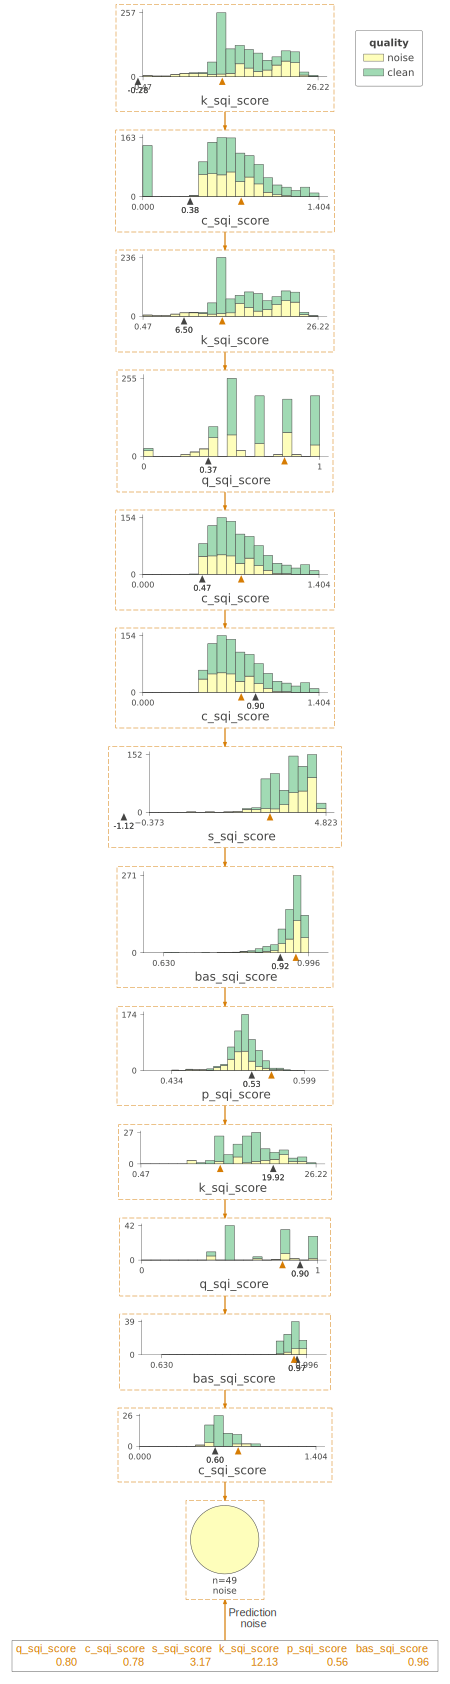

In [105]:
viz

# Kmeans

<AxesSubplot:>

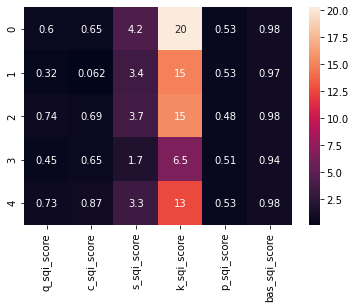

In [80]:
# Kmeans
# Import Standard Scaler
X = df_val_sqi.iloc[:,2:8].values

sc = StandardScaler()
X_kmeans = sc.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0, init="k-means++")
kmeans.fit(X_kmeans)


# Cluster centers coordinates
# Let's use inverse transform to have the real coordinates 
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)


# Create a heatmap 
sns.heatmap(pd.DataFrame(cluster_centers, columns=sqi_names),  annot=True)


In [81]:
df_val_sqi['kmeans'] = kmeans.predict(X_kmeans)

In [84]:
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))


WCSS for K=1 --> 7200.000000000006
WCSS for K=2 --> 5553.648224134901
WCSS for K=3 --> 4590.04396829362
WCSS for K=4 --> 3945.2204822451235
WCSS for K=5 --> 3421.1051848885336
WCSS for K=6 --> 3136.9221752794765
WCSS for K=7 --> 2896.336555136839
WCSS for K=8 --> 2731.89591420912
WCSS for K=9 --> 2527.422402670769
WCSS for K=10 --> 2368.9552345306865


In [85]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

In [86]:
df_val_sqi.columns

Index(['timestamp_start', 'timestamp_end', 'qSQI_score', 'cSQI_score',
       'sSQI_score', 'kSQI_score', 'pSQI_score', 'basSQI_score', 'classif',
       'classif_avg', 'rfc_pred', 'dtc_pred', 'consensus', 'kmeans'],
      dtype='object')

In [90]:
fig = px.scatter(df_val_sqi, x='sSQI_score', y='kSQI_score', color='kmeans')
fig.show()

In [103]:
for kmean in range(5):
    
    df_temp = df_val_sqi[df_val_sqi['kmeans'] == kmean]

    print(f'\n val for kmean {kmean}')
    X_val = df_temp.iloc[:, 2:8].values
    y_val = df_temp['consensus'].values
    y_pred_val = ecg_qc_dtc.model.predict(X_val)
    print(f'f1_score : {f1_score(y_val, y_pred_val)}')
    print(f'accuracy_score : {accuracy_score(y_val, y_pred_val)}')
    print(f'size : {len(y_val)}')
    print(f"% of quality: ': {df_temp['consensus'].mean()}")


 val for kmean 0
f1_score : 0.5080645161290323
accuracy_score : 0.45535714285714285
size : 448
% of quality: ': 0.53125

 val for kmean 1
f1_score : 0.4228571428571428
accuracy_score : 0.2887323943661972
size : 142
% of quality: ': 0.9507042253521126

 val for kmean 2
f1_score : 0.5131578947368421
accuracy_score : 0.34513274336283184
size : 113
% of quality: ': 0.45132743362831856

 val for kmean 3
f1_score : 0.06666666666666667
accuracy_score : 0.42857142857142855
size : 49
% of quality: ': 0.061224489795918366

 val for kmean 4
f1_score : 0.8140556368960468
accuracy_score : 0.7165178571428571
size : 448
% of quality: ': 0.8214285714285714


In [106]:
# apply kmeans from train model

# Kmeans
# Import Standard Scaler
X = df_train_sqi.iloc[:,2:8].values

sc = StandardScaler()
X_kmeans = sc.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0, init="k-means++")
kmeans.fit(X_kmeans)
df_train_sqi['kmeans'] = kmeans.predict(X_kmeans)

X_val = df_val_sqi.iloc[:,2:8].values
X_val = sc.transform(X_val)
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

df_val_sqi['kmeans'] = kmeans.predict(X_val)

In [108]:
for kmean in range(5):
    
    df_temp = df_train_sqi[df_train_sqi['kmeans'] == kmean]

    print(f'\n val for kmean {kmean}')
    X_val = df_temp.iloc[:, 2:8].values
    y_val = df_temp['consensus'].values
    y_pred_val = ecg_qc_dtc.model.predict(X_val)
    print(f'f1_score : {f1_score(y_val, y_pred_val)}')
    print(f'accuracy_score : {accuracy_score(y_val, y_pred_val)}')
    print(f'size : {len(y_val)}')
    print(f'% if total : {len(y_val)/df_train_sqi.shape[0]}')
    print(f"% of quality: ': {df_temp['consensus'].mean()}")


 val for kmean 0
f1_score : 0.0
accuracy_score : 0.9981114258734656
size : 1059
% if total : 0.16045454545454546
% of quality: ': 0.0

 val for kmean 1
f1_score : 0.9651081646894626
accuracy_score : 0.9481865284974094
size : 1930
% if total : 0.2924242424242424
% of quality: ': 0.7248704663212435

 val for kmean 2
f1_score : 0.6549707602339182
accuracy_score : 0.8959435626102292
size : 567
% if total : 0.08590909090909091
% of quality: ': 0.13756613756613756

 val for kmean 3
f1_score : 0.9569288389513109
accuracy_score : 0.9437652811735942
size : 1636
% if total : 0.24787878787878787
% of quality: ': 0.6356968215158925

 val for kmean 4
f1_score : 0.9982161969318588
accuracy_score : 0.9964488636363636
size : 1408
% if total : 0.21333333333333335
% of quality: ': 0.9936079545454546


In [109]:
for kmean in range(5):
    
    df_temp = df_val_sqi[df_val_sqi['kmeans'] == kmean]

    print(f'\n val for kmean {kmean}')
    X_val = df_temp.iloc[:, 2:8].values
    y_val = df_temp['consensus'].values
    y_pred_val = ecg_qc_dtc.model.predict(X_val)
    print(f'f1_score : {f1_score(y_val, y_pred_val)}')
    print(f'accuracy_score : {accuracy_score(y_val, y_pred_val)}')
    print(f'size : {len(y_val)}')
    print(f'% if total : {len(y_val)/df_val_sqi.shape[0]}')
    print(f"% of quality: ': {df_temp['consensus'].mean()}")


 val for kmean 0
f1_score : 0.0
accuracy_score : 0.0
size : 4
% if total : 0.0033333333333333335
% of quality: ': 0.0

 val for kmean 1
f1_score : 0.806015037593985
accuracy_score : 0.6950354609929078
size : 423
% if total : 0.3525
% of quality: ': 0.8108747044917257

 val for kmean 2
f1_score : 0.0
accuracy_score : 1.0
size : 2
% if total : 0.0016666666666666668
% of quality: ': 0.0

 val for kmean 3
f1_score : 0.46022727272727265
accuracy_score : 0.4043887147335423
size : 319
% if total : 0.2658333333333333
% of quality: ': 0.7084639498432602

 val for kmean 4
f1_score : 0.512621359223301
accuracy_score : 0.4446902654867257
size : 452
% if total : 0.37666666666666665
% of quality: ': 0.5


/home/aura-alexis/github/ecg_qc_viz/env/lib64/python3.6/site-packages/scikit_learn-0.24.1-py3.6-linux-x86_64.egg/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.



In [129]:
for record in df_train_sqi['record'].unique():
    print(f'record : {record}')
    print(df_train_sqi[df_train_sqi['record'] == record]['kmeans'].value_counts()/df_train_sqi[df_train_sqi['record'] == record].shape[0])

record : emg6+emg6- 77
1    0.518148
3    0.393333
2    0.083704
4    0.004444
0    0.000370
Name: kmeans, dtype: float64
record : ECG1+ECG1- 11
0    0.586667
3    0.205000
1    0.181667
2    0.026667
Name: kmeans, dtype: float64
record : EMG1+EMG1- 3
4    0.664762
2    0.139524
3    0.097619
1    0.097143
0    0.000952
Name: kmeans, dtype: float64


In [131]:
for kmean in df_train_sqi['kmeans'].unique():
    print(f'kmean : {kmean}')
    print(df_train_sqi[df_train_sqi['kmeans'] == kmean]['record'].value_counts()/df_train_sqi[df_train_sqi['kmeans'] == kmean].shape[0])

kmean : 3
emg6+emg6- 77    0.649144
ECG1+ECG1- 11    0.225550
EMG1+EMG1- 3     0.125306
Name: record, dtype: float64
kmean : 1
emg6+emg6- 77    0.724870
ECG1+ECG1- 11    0.169430
EMG1+EMG1- 3     0.105699
Name: record, dtype: float64
kmean : 2
EMG1+EMG1- 3     0.516755
emg6+emg6- 77    0.398589
ECG1+ECG1- 11    0.084656
Name: record, dtype: float64
kmean : 4
EMG1+EMG1- 3     0.991477
emg6+emg6- 77    0.008523
Name: record, dtype: float64
kmean : 0
ECG1+ECG1- 11    0.997167
EMG1+EMG1- 3     0.001889
emg6+emg6- 77    0.000944
Name: record, dtype: float64


In [119]:
df_train_sqi.groupby('record').count()

timestamp_start  timestamp_end  qSQI_score  cSQI_score  \
record                                                                  
ECG1+ECG1- 11             1800           1800        1800        1800   
EMG1+EMG1- 3              2100           2100        2100        2100   
emg6+emg6- 77             2700           2700        2700        2700   

               sSQI_score  kSQI_score  pSQI_score  basSQI_score  annot_2  \
record                                                                     
ECG1+ECG1- 11        1800        1800        1800          1800     1800   
EMG1+EMG1- 3         2100        2100        2100          2100     2100   
emg6+emg6- 77        2700        2700        2700          2700     2700   

               annot_3  consensus  rfc_pred  dtc_pred  kmeans  
record                                                         
ECG1+ECG1- 11     1800       1800      1800      1800    1800  
EMG1+EMG1- 3      2100       2100      2100      2100    2100  
emg6+emg6- 77     2700       2700      2700      2700    2700

In [113]:
df_train_sqi

timestamp_start                  timestamp_end  \
0     2020-12-18 13:00:00.000000000  2020-12-18 13:00:02.000000000   
1     2020-12-18 13:00:02.000000000  2020-12-18 13:00:04.000000000   
2     2020-12-18 13:00:04.000000000  2020-12-18 13:00:06.000000000   
3     2020-12-18 13:00:06.000000000  2020-12-18 13:00:08.000000000   
4     2020-12-18 13:00:08.000000000  2020-12-18 13:00:10.000000000   
...                             ...                            ...   
6595  2020-12-14 23:04:50.000000000  2020-12-14 23:04:52.000000000   
6596  2020-12-14 23:04:52.000000000  2020-12-14 23:04:54.000000000   
6597  2020-12-14 23:04:54.000000000  2020-12-14 23:04:56.000000000   
6598  2020-12-14 23:04:56.000000000  2020-12-14 23:04:58.000000000   
6599  2020-12-14 23:04:58.000000000  2020-12-14 23:04:59.996093750   

      qSQI_score  cSQI_score  sSQI_score  kSQI_score  pSQI_score  \
0          1.000       0.501       1.924       6.664       0.499   
1          1.000       0.627       2.056       7.390       0.515   
2          0.857       0.820       1.333       3.494       0.484   
3          1.000       0.499       0.884       2.709       0.468   
4          1.000       0.482       1.817       5.480       0.433   
...          ...         ...         ...         ...         ...   
6595       1.000       0.827       5.402      34.028       0.474   
6596       0.667       1.086       5.181      29.517       0.439   
6597       1.000       0.465       5.277      29.947       0.407   
6598       0.800       0.506       5.773      37.481       0.475   
6599       0.500       0.604       5.840      37.526       0.498   

      basSQI_score  annot_2  annot_3         record  consensus  rfc_pred  \
0            0.967        1        1  emg6+emg6- 77          1         1   
1            0.978        1        1  emg6+emg6- 77          1         1   
2            0.975        1        1  emg6+emg6- 77          1         1   
3            0.930        1        1  emg6+emg6- 77          1         1   
4            0.991        1        1  emg6+emg6- 77          1         1   
...            ...      ...      ...            ...        ...       ...   
6595         0.976        1        1   EMG1+EMG1- 3          1         1   
6596         0.994        1        1   EMG1+EMG1- 3          1         1   
6597         0.999        1        1   EMG1+EMG1- 3          1         1   
6598         0.986        1        1   EMG1+EMG1- 3          1         1   
6599         0.996        1        1   EMG1+EMG1- 3          1         1   

      dtc_pred  kmeans  
0            1       3  
1            1       1  
2            1       1  
3            1       3  
4            1       3  
...        ...     ...  
6595         1       4  
6596         1       4  
6597         1       4  
6598         1       4  
6599         1       4  

[6600 rows x 15 columns]

# Decision Tree